### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
import cv2
import csv
import glob

from sklearn.utils import shuffle
from tqdm import tqdm

import joblib

from sklearn import metrics
from sklearn.model_selection import cross_val_score

np.random.seed(12345)

### Create Data with Label 

In [2]:
header = ["label"]
        
for i in range(0, 784):
    header.append("pixel" + str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
for label in range(10):
    dirList = glob.glob("assamese digits/" + str(label) + "/*.jpg")
    
    for img_path in dirList:
        img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        re_img = cv2.resize(img_gray, (28, 28), interpolation=cv2.INTER_AREA)
        
        data = []
        data.append(label)
        rows, cols = re_img.shape
        
        for i in range(rows):
            for j in range(cols):
                k = re_img[i, j]
                data.append(k / 255.0)  # Normalize to [0, 1] range

        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

### Load the Dataset 

In [3]:
data = pd.read_csv('dataset.csv')
data = shuffle(data)

In [4]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8643,5,0.992157,0.988235,0.996078,0.988235,0.980392,0.952941,0.901961,0.701961,0.282353,...,0.796078,0.745098,0.870588,0.980392,0.980392,0.992157,0.988235,1.000000,0.996078,0.992157
11031,7,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,...,1.000000,1.000000,1.000000,0.996078,0.996078,0.992157,0.929412,0.231373,0.105882,0.349020
12851,8,0.996078,0.992157,0.992157,0.929412,0.901961,0.992157,1.000000,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1545,0,1.000000,1.000000,1.000000,0.996078,1.000000,0.992157,0.996078,1.000000,0.996078,...,0.866667,0.988235,0.992157,0.988235,0.992157,1.000000,0.996078,1.000000,1.000000,1.000000
2626,1,1.000000,1.000000,0.996078,1.000000,0.996078,0.996078,0.996078,0.992157,0.988235,...,0.537255,0.850980,0.870588,0.972549,0.992157,0.992157,0.996078,0.996078,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11689,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,...,1.000000,0.996078,0.996078,0.996078,0.992157,0.992157,0.996078,0.996078,0.725490,0.215686
3492,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996078,0.996078,0.996078,0.992157,0.988235,0.764706,0.596078,0.368627,0.160784,0.443137
2177,1,0.996078,0.992157,0.960784,0.992157,0.996078,0.996078,0.996078,0.992157,0.996078,...,0.996078,1.000000,0.996078,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
11749,7,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.992157,...,1.000000,1.000000,1.000000,0.996078,0.996078,0.796078,0.337255,0.203922,0.682353,0.996078


### Input Output 

In [5]:
X = data.drop(["label"], axis=1)
y = data["label"]

### Image Preview 

4


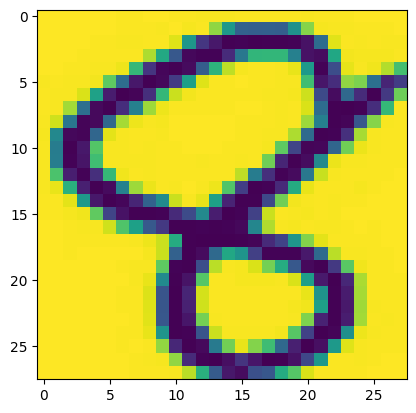

In [6]:
%matplotlib inline
idx = 7416
img = X.loc[idx].values.reshape(28, 28)
print(y[idx])
plt.imshow(img)

### Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Fit the Model using svc

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Calculate Accuracy 

In [9]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9225352112676056


### Cross Value Score 

In [10]:
cvs = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
print("Cross Value Score:", cvs.mean())

Cross Value Score: 0.9148526290516207
